# PROYECTO DE DIAGNOSTICO DE DIABETES

## 1. Importando librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Carga de los datos

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Exploracion y analisis de los datos

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Describamos los datos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


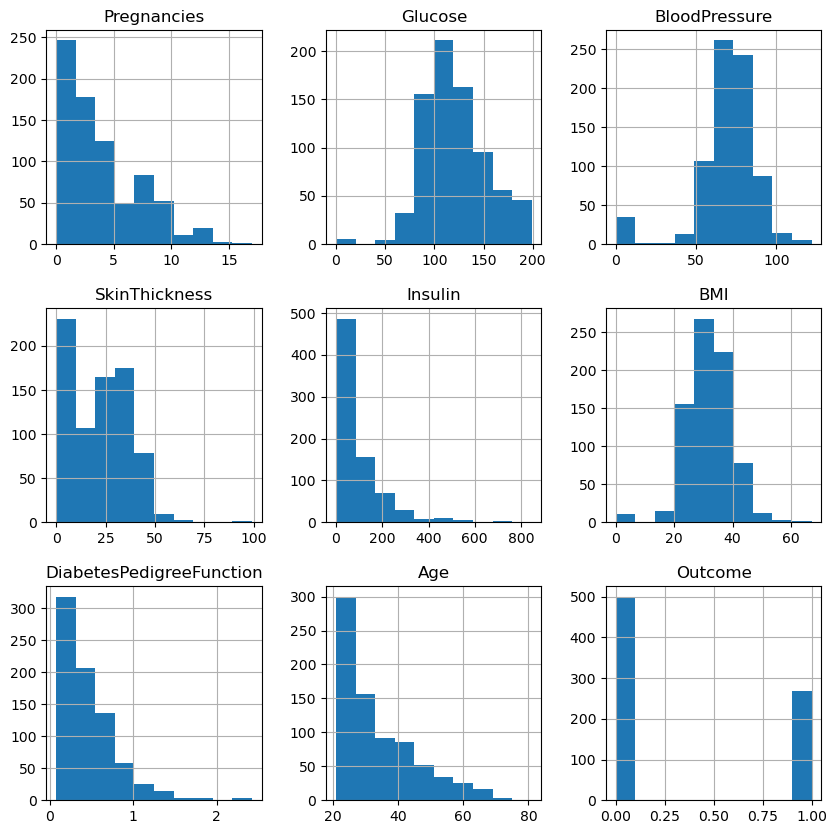

In [6]:
#Histograma
df.hist(bins=10,figsize=(10,10))
plt.show()

### Contiene datos nulos?

In [7]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
#Si tiene datos nulos
#Se reemplaza con el valor 0 como reemplazo para los valores faltantes.
#df.fillna(0, inplace=True)
#df.isnull().any()

In [9]:
#Tabla de Correlacion
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

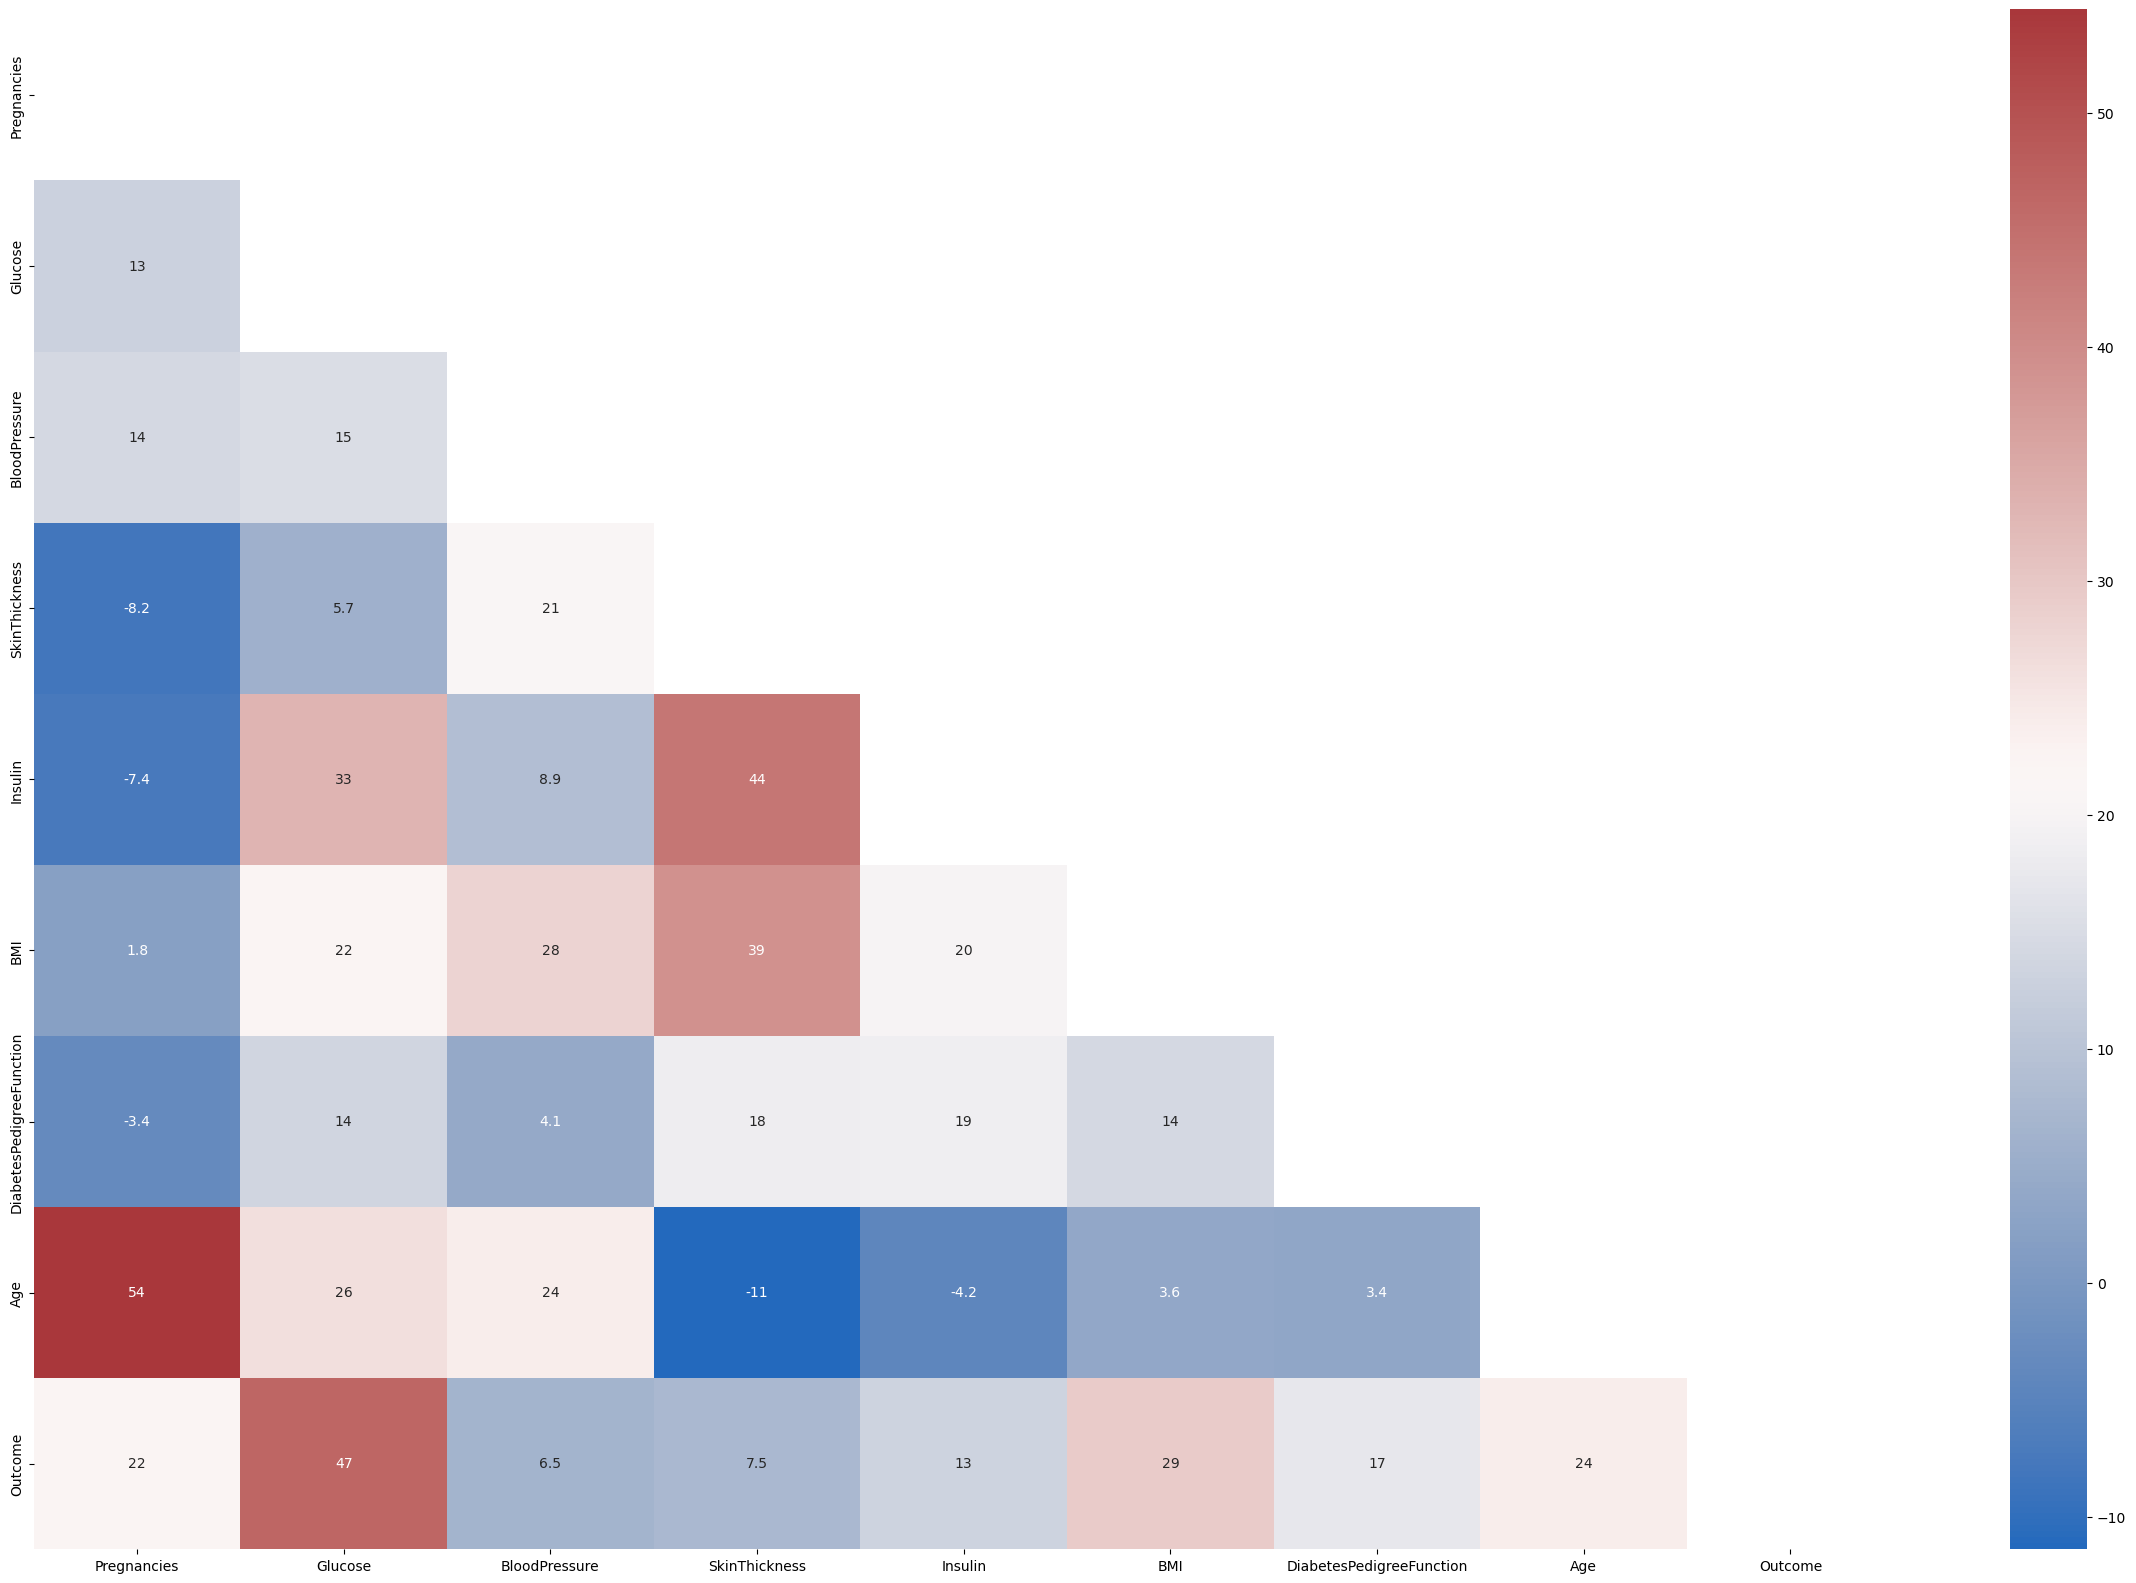

In [10]:
triangle = np.zeros_like(df.corr())
triangle[np.triu_indices_from(triangle)] = True

plt.figure(figsize=(30, 20))
sns.heatmap(df.corr() * 100, annot=True, mask=triangle, cmap='vlag')

<Axes: xlabel='count', ylabel='Outcome'>

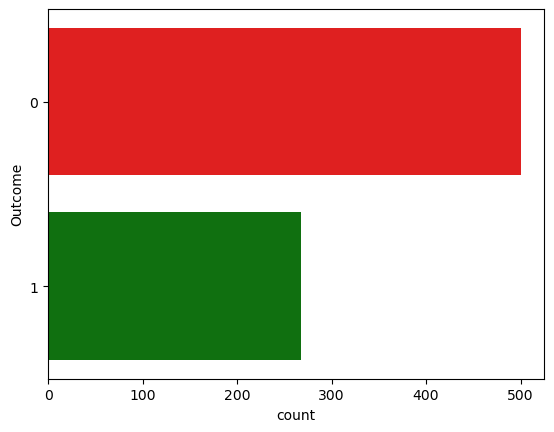

In [11]:
#Diagrama de casos positivos y negativos
palette = ["red", "green"]
sns.countplot(y=df['Outcome'],palette=palette)
# 0 => paciente sin diabetes
# 1 => paciente con diabetes

C:\Users\Danny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


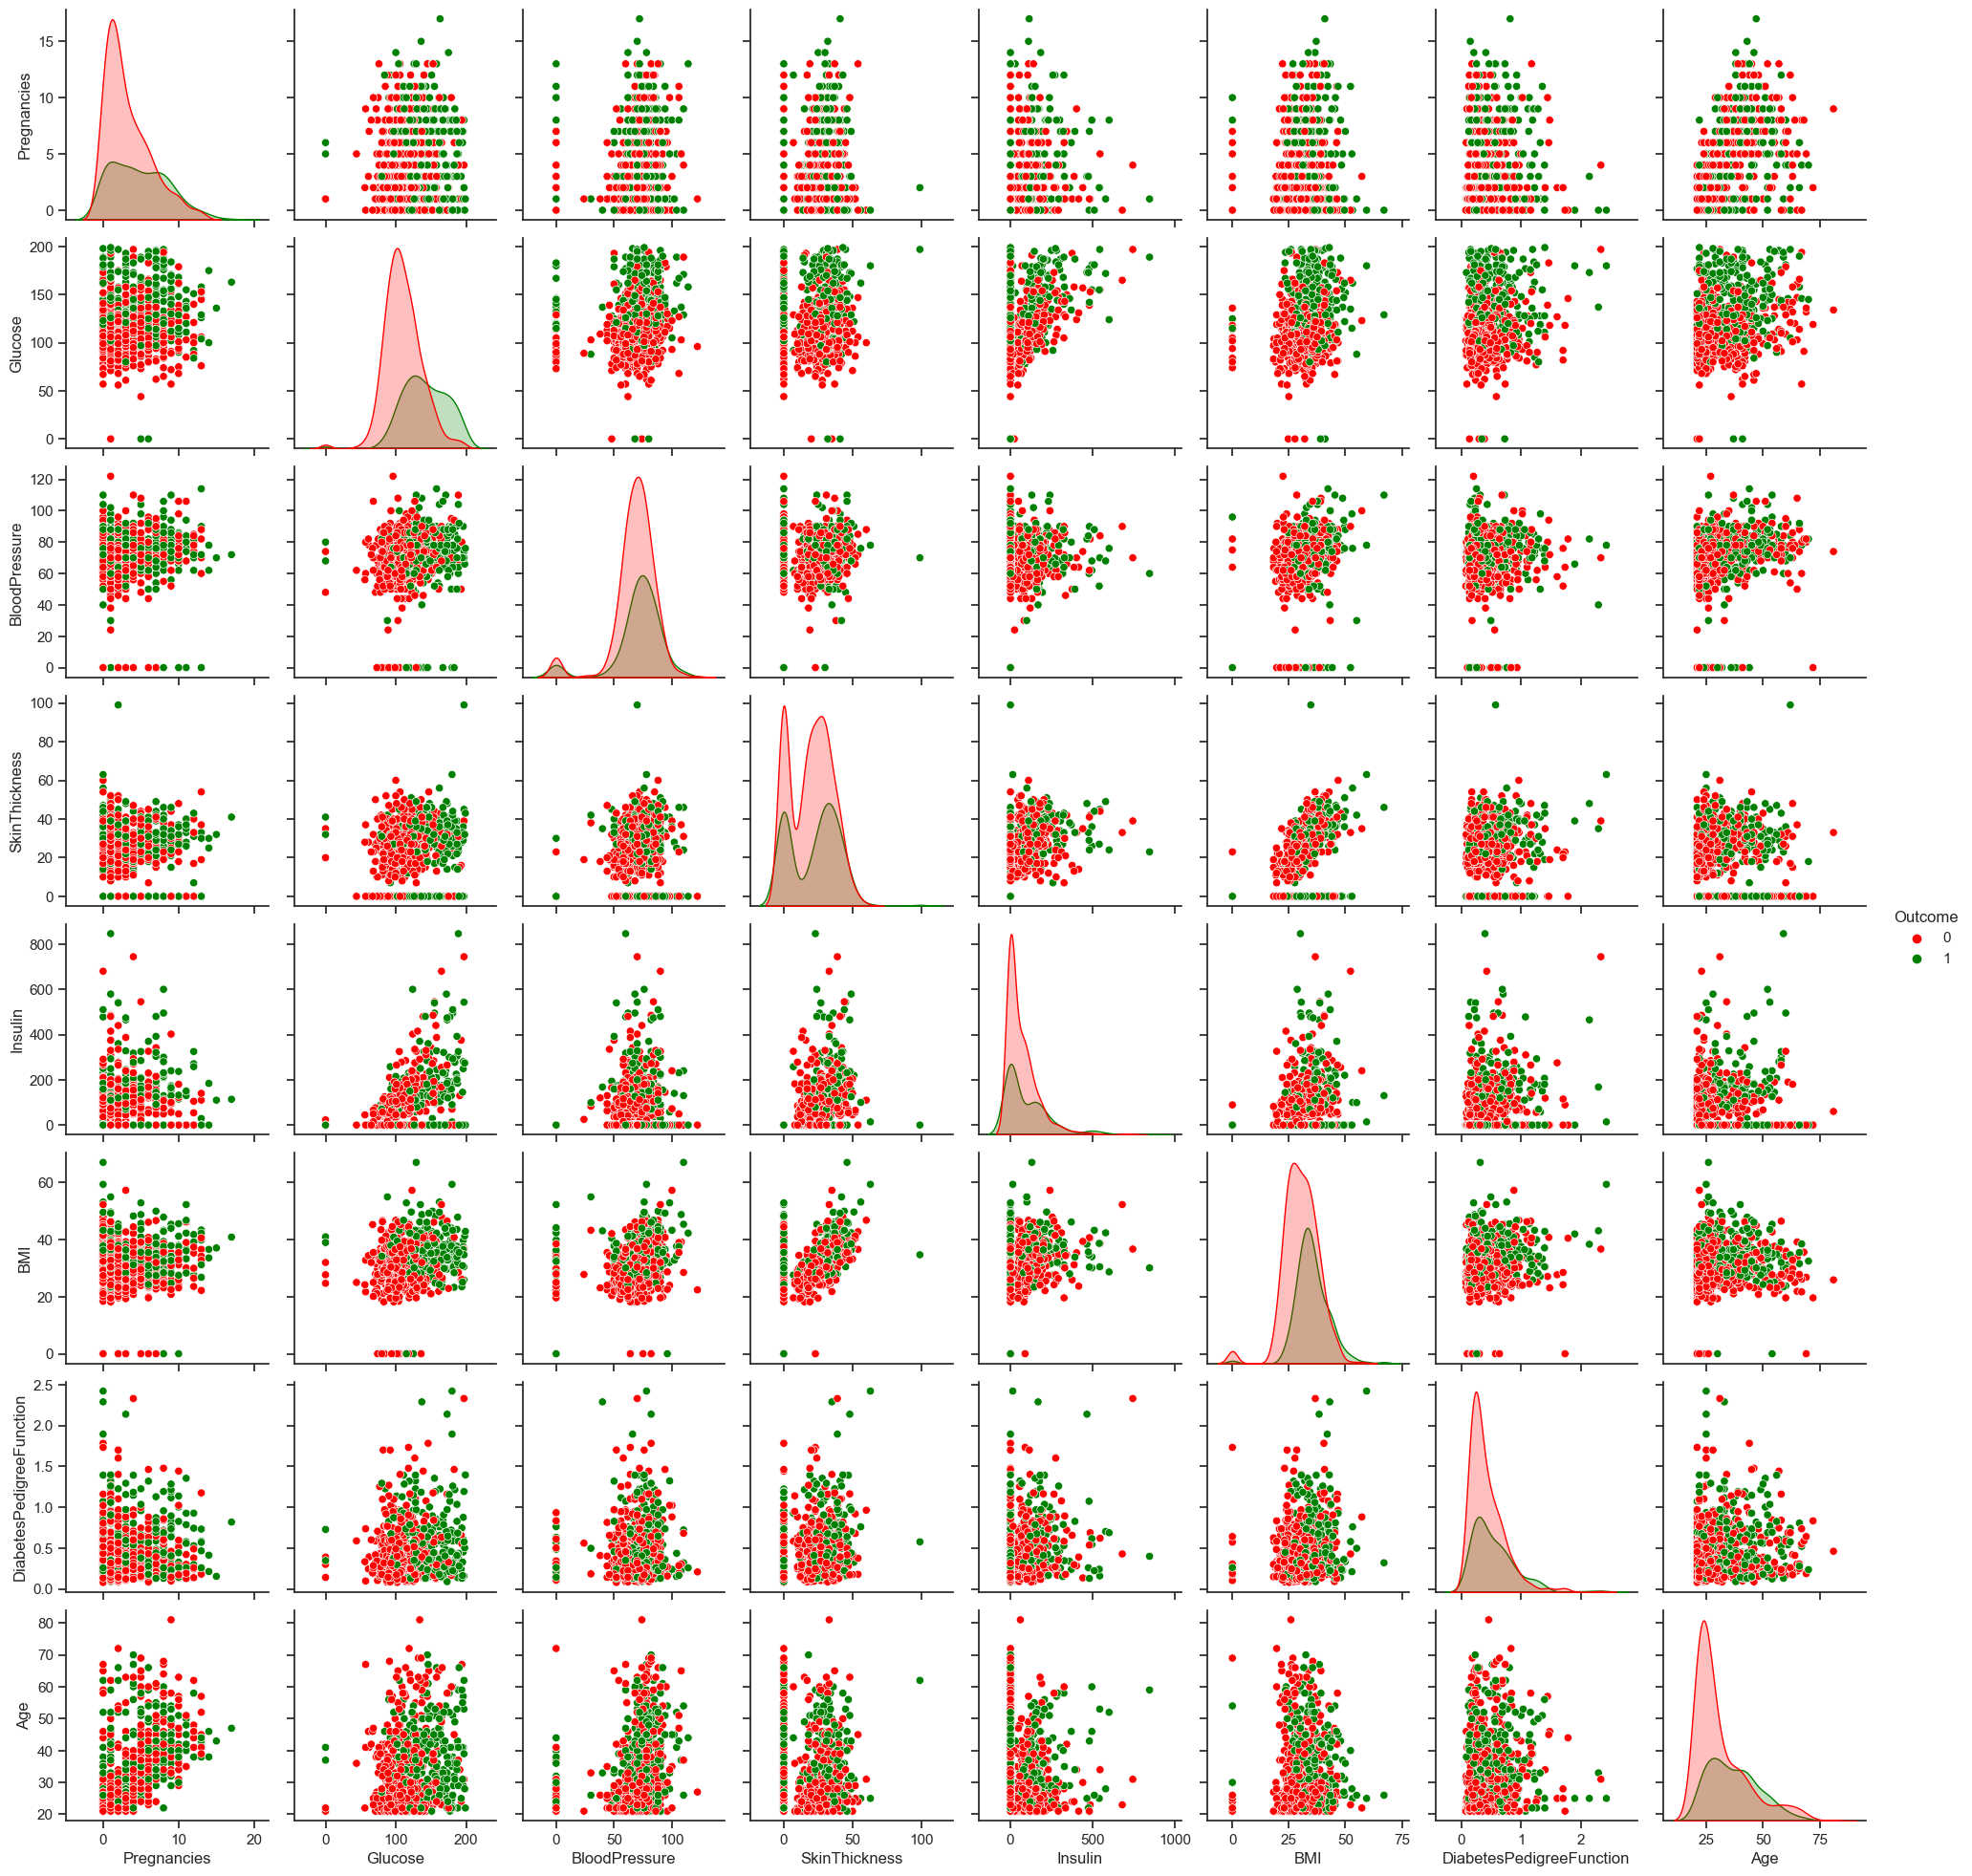

In [12]:
palette = ["red", "green"]
sns.set(style="ticks", palette=palette)
sns.pairplot(df, hue="Outcome")

<Axes: >

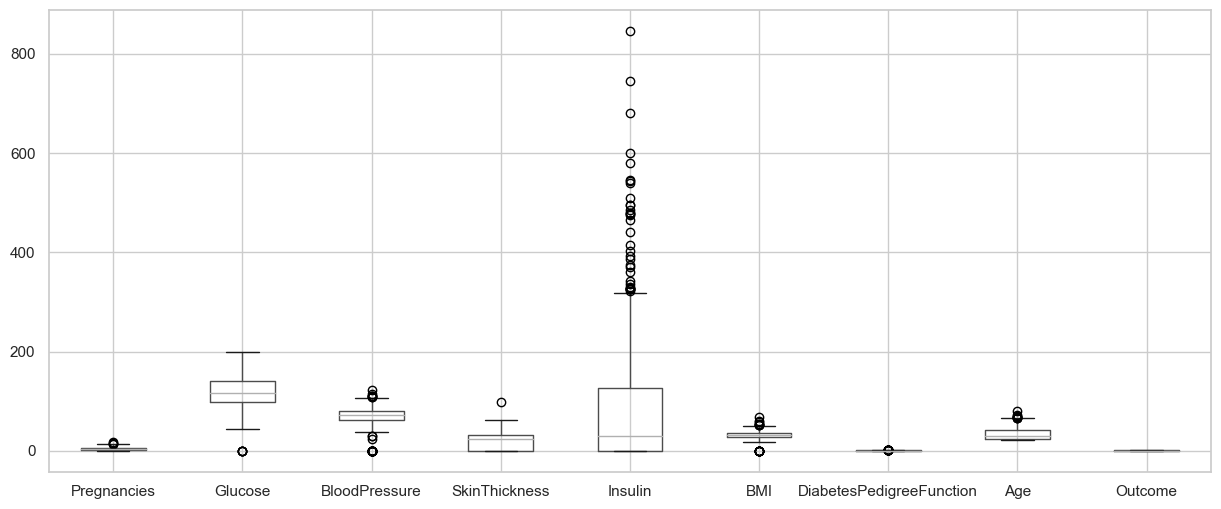

In [13]:
#Diagrama de caja para visualización de valores atípicos
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

## 4. Preparacion de los datos

In [14]:
#Calcula el rango intercuartílico (IQR)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Eliminando outliers y comparando el dataset limpio DF_OUT con el anterior
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 9), (639, 9))

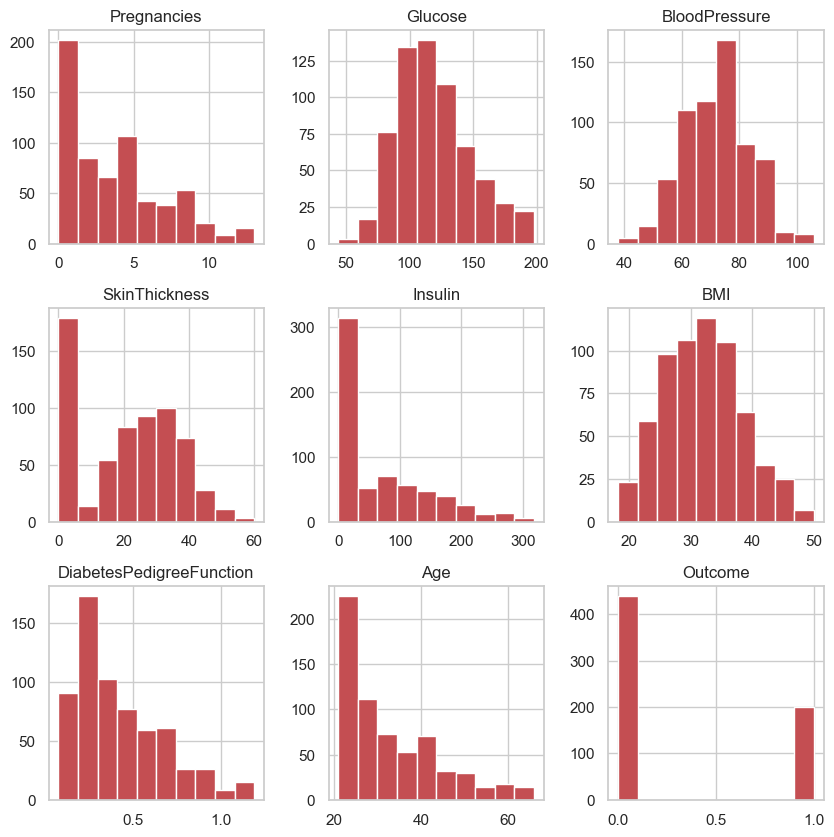

In [15]:
#Histograma Actualizado
df_out.hist(bins=10,figsize=(10,10), color='r')
plt.show()

In [16]:
#Extraccion de las características y objetivos
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

#División de datos de prueba y los de entrenamiento con una relación 80,20.
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

#Calcular las métricas de evaluación TN, FP, FN y TP
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

# Listas para almacenar la precisión y la curva ROC_AUC
acc = []
roc = []

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#Impresion para la Validacion Cruzada
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

## 5. Modelos de prediccion

In [17]:
# Importar la clase KNeighborsClassifier desde la biblioteca scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Importar la métrica roc_auc_score para evaluar la calidad del modelo
from sklearn.metrics import roc_auc_score

# Crear un clasificador KNN con 3 vecinos
clf = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo usando los datos de entrenamiento
clf.fit(train_X, train_y)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(test_X)

# Calcular la precisión del modelo
ac = accuracy_score(test_y, y_pred)
acc.append(ac)

# Calcular la curva ROC AUC
rc = roc_auc_score(test_y, y_pred)
roc.append(rc)

# Imprimir los resultados de precisión y ROC AUC
print("\nAccuracy: {0} ROC AUC: {1}".format(ac, rc))

# Realizar validación cruzada con 10 folds
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)

# Mostrar los resultados de la validación cruzada (función display_result no proporcionada)
display_result(result)



Accuracy: 0.6953125 ROC AUC: 0.6441860465116279
TP:  [ 5  9  9  6 10 11 10  6 11  8]
TN:  [25 30 30 30 30 28 29 31 30 24]
FN:  [11  6  6  9  6  5  6 10  5  8]
FP:  [11  6  6  6  5  7  6  4  5 11]


In [18]:
#Support Vector Machine
from sklearn.svm import SVC

#Creacion del modelo SVM lineal
clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

# Accuracy de test del modelo
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#Hallar el ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.734375 ROC 0.6621067031463748
TP:  [ 7 10  7  6 10  8  9  9 10  9]
TN:  [32 32 32 34 34 28 31 35 31 29]
FN:  [9 5 8 9 6 8 7 7 6 7]
FP:  [4 4 4 2 1 7 4 0 4 6]


In [19]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.7578125 ROC 0.7027359781121751
TP:  [10  9  7  5  9 11  9 10 12  8]
TN:  [32 30 34 33 33 27 31 31 30 28]
FN:  [ 6  6  8 10  7  5  7  6  4  8]
FP:  [4 6 2 3 2 8 4 4 5 7]


# 6. Comparacion de Resultados

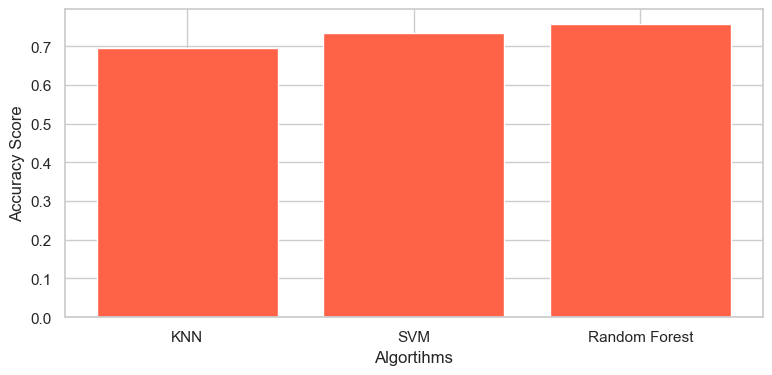

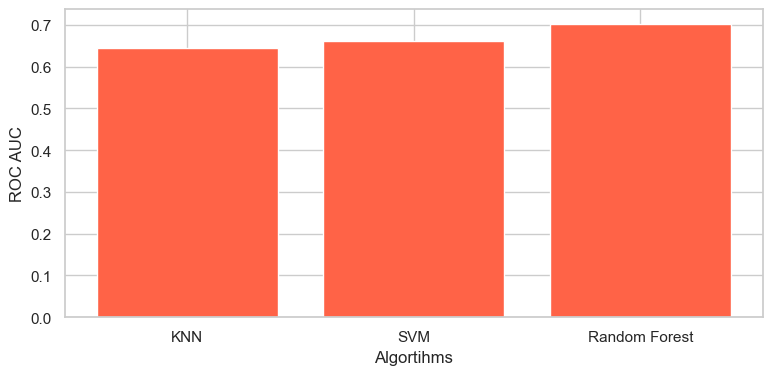

In [20]:
#Gráfico de barras para la comparacion.

ax=plt.figure(figsize=(9,4))
plt.bar(['KNN','SVM','Random Forest'],acc,label='Accuracy', color='tomato')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['KNN','SVM','Random Forest'],roc,label='ROC AUC', color='tomato')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()